In [69]:
import csv
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.layers import Flatten, Dense, Lambda, Convolution2D, MaxPooling2D
from keras.models import Sequential

In [70]:
UDACITY_DATA = './data/'
MY_DATA = './SimulationData/'

data_path = UDACITY_DATA
# data_path = MY_DATA

lines = []
with open(data_path + 'driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    
    # Skip headers in Udacity Data
    if data_path == UDACITY_DATA:
        next(reader)

    for i, line in enumerate(reader):
        lines.append(line)

images = []
steering_angles  = []
for line in lines:
    source_path = line[0]

    filename = source_path.split('/')[-1]
    current_path = data_path + 'IMG/' + filename

    image = cv2.imread(current_path)
    # Convert to RGB as drive.py uses RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

    angle = float(line[3])
    steering_angles.append(angle)

X_train = np.array(images)
y_train = np.array(steering_angles)

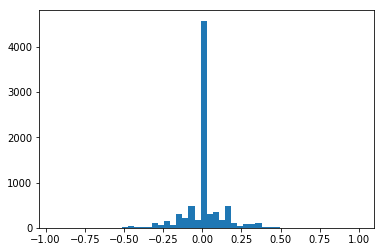

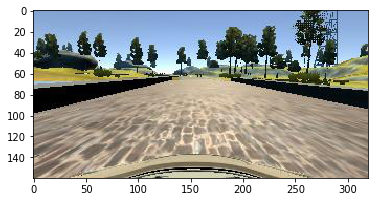

In [71]:
# Visualise the data

# Steering angle distribution
# the histogram of the data
n, bins, patches = plt.hist(y_train, 50)
plt.show()

# Image
test_img = X_train[0]
plt.imshow(test_img)

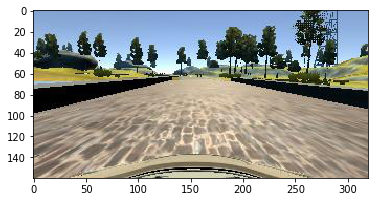

In [72]:
# Visualise the preprocessing
# (put the functions here and reference in the keras layers later)
def normalise(img):
    return img / 255.0 - 0.5

def crop(img):
    # TODO
    return img


test_img = crop(test_img)
plt.imshow(test_img)

In [73]:
# Architecture
model = Sequential()
# Preprocessing layers
model.add(Lambda(normalise, input_shape=(160, 320, 3)))

# Layers
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))


In [76]:
# Training
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=3)
model.save('model.h5')

Train on 6428 samples, validate on 1608 samples
Epoch 1/3
6428/6428 [==============================] - 21s - loss: 0.0116 - val_loss: 0.0116
Epoch 2/3
6428/6428 [==============================] - 21s - loss: 0.0084 - val_loss: 0.0125
Epoch 3/3
6428/6428 [==============================] - 21s - loss: 0.0062 - val_loss: 0.0125


dict_keys(['loss', 'val_loss'])


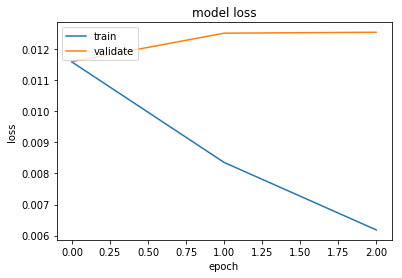

In [78]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()